In [36]:
import uproot4
from matplotlib import pyplot as plt
from hist import Hist  
import hist
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg
import seaborn as sns
import pandas as pd
import numpy as np

### Reading the root file

In [37]:
file=uproot4.open("pion_test22.edm4hep.root")

tree= file["events"]

entries=tree.num_entries

print(f"Total entries is {entries}")

Total entries is 20000


In [38]:
pos_x= tree['gem_trd/gem_trd.position.x'].array()
pos_y= tree['gem_trd/gem_trd.position.y'].array()
pos_z= tree['gem_trd/gem_trd.position.z'].array()
ene= tree['gem_trd/gem_trd.EDep'].array()*(10**6)



flat_posX=ak.flatten(pos_x)
flat_posY=ak.flatten(pos_y)
flat_posZ=ak.flatten(pos_z)
flat_ene=ak.flatten(ene) #to keV


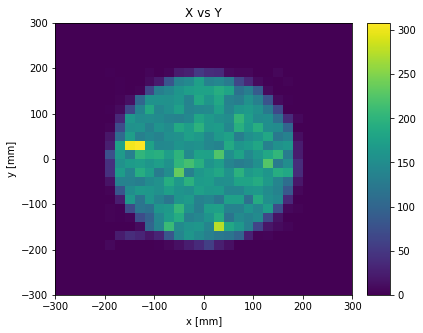

In [39]:
#X vs Y
plt.figure(figsize=(6,5))
h = Hist(
    hist.axis.Regular(30, -300, 300, name="X", label="x [mm]", flow=False),
    hist.axis.Regular(30, -300, 300, name="Y", label="y [mm]", flow=False),
)


h.fill(flat_posX,flat_posY)
h.plot()
plt.title("X vs Y")
plt.show()

### Reading root file for e-

In [40]:
file2=uproot4.open("ele_test22.edm4hep.root")

tree2= file2["events"]

entries2=tree2.num_entries

print(f"Total entries is {entries2}")

Total entries is 20000


In [41]:
pos_x= tree2['gem_trd/gem_trd.position.x'].array()
pos_y= tree2['gem_trd/gem_trd.position.y'].array()
pos_zE= tree2['gem_trd/gem_trd.position.z'].array()
ene_E= tree2['gem_trd/gem_trd.EDep'].array()*(10**6)



flat_posX=ak.flatten(pos_x)
flat_posY=ak.flatten(pos_y)
flat_posZE=ak.flatten(pos_zE)
flat_eneE=ak.flatten(ene_E) #to keV



In [42]:
ene_E

<Array [[36.9], [44.7], ... [39.9, 3.83]] type='20000 * var * float64'>

In [43]:
print(f"The flattened shape for pions is {len(flat_posZ)}")
print(f"The flattened shape for electrons is {len(flat_posZE)}")

The flattened shape for pions is 43691
The flattened shape for electrons is 42426


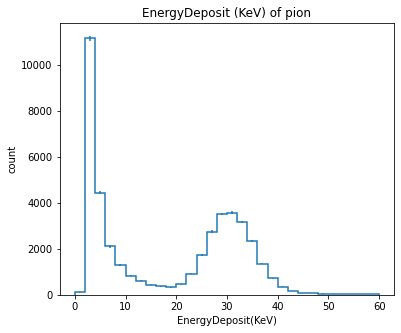

In [44]:
#Energy Deposit
plt.figure(figsize=(6,5))
h = Hist(hist.axis.Regular(30, 0, 60, name="EnergyDeposit(KeV)", label="EnergyDeposit(KeV)", flow=False),)

h.fill(flat_ene)
h.plot()
plt.ylabel('count')
plt.title("EnergyDeposit (KeV) of pion")
plt.show()

/home/nilay/.local/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


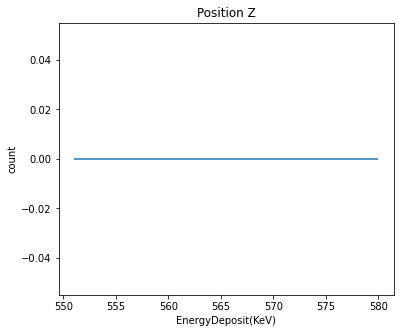

In [45]:
#Position Z
plt.figure(figsize=(6,5))
h = Hist(hist.axis.Regular(50,551, 580, name="EnergyDeposit(KeV)", label="EnergyDeposit(KeV)", flow=False),)

h.fill(flat_posZ)
h.plot()
plt.ylabel('count')
plt.title("Position Z")
plt.show()

### Energy deposit for Pion & electron 

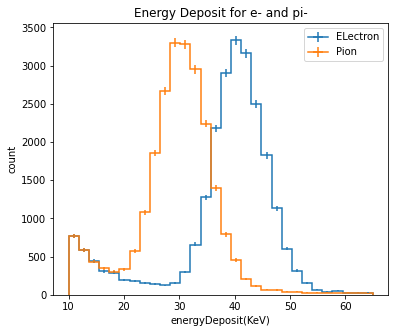

In [46]:
#energyDeposit of electron vs pion

plt.figure(figsize=(6,5))
h_pion = Hist(
    hist.axis.Regular(30, 10, 65, name="energyDeposit(KeV)", label="energyDeposit(KeV)", flow=False),
)
h_pion.fill(flat_ene)


h_electron = Hist(
    hist.axis.Regular(30, 10, 65, name="energyDeposit(KeV)", label="energyDeposit(KeV)", flow=False),
)
h_electron.fill(flat_eneE)

s=hist.Stack.from_dict({"ELectron": h_electron, "Pion": h_pion})
s.plot()
plt.ylabel("count")
plt.legend()
plt.title("Energy Deposit for e- and pi-")
plt.show()


### Randomly sampling pions

In [47]:
# #randomly sampling
# data={
#     "position Z pion":flat_posZ,
#     "energyDeposit_pion":flat_ene
# }
# df_pion=pd.DataFrame(data=data)
#df_pion=df_pion.sample(n=len(flat_eneE),random_state=32)

# Data Generation

In [48]:
data={
    "position Z ele":flat_posZE,
    "energyDeposit_ele":flat_eneE
    
}
df_ele=pd.DataFrame(data=data)

In [49]:
df_ele

,position Z ele,energyDeposit_ele
0,510.182146,36.941750
1,510.000000,44.746372
2,509.921619,37.402941
3,521.309159,58.339305
4,522.609575,3.406628
...,...,...
42421,480.664929,3.163929
42422,510.048280,45.946850
42423,532.187435,2.982915
42424,509.988077,39.869541


In [50]:
data={
    "position Z pion":flat_posZ,
    "energyDeposit_pion":flat_ene
    
}
df_pion=pd.DataFrame(data=data)

In [51]:
itr=len(df_ele)

f= open("electron_data.txt","w+")
for i in range(0,itr):
    f.write(f"{df_ele['energyDeposit_ele'].iloc[i]} {df_ele['position Z ele'].iloc[i]}\n")
f.close()

In [52]:
itr=len(df_pion)

f= open("pion_data.txt","w+")
for i in range(0,itr):
    f.write(f"{df_pion['energyDeposit_pion'].iloc[i]} {df_pion['position Z pion'].iloc[i]}\n")
f.close()